In [1]:
#importing necessart packages:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#loading necessary Data set:

application_df=pd.read_csv("C:\\Ankur Personal\\Data Science\\Risk Analysis Case Study\\application_data.csv")
prev_app_df=pd.read_csv("C:\\Ankur Personal\\Data Science\\Risk Analysis Case Study\\previous_application.csv")

In [4]:
#current rows and cloumns in both the dataset:

print("Application data Rows and Columns:",application_df.shape)
print("--------------------------------------")
print("Previour Application Rows and Columns:", prev_app_df.shape)


Application data Rows and Columns: (307511, 122)
--------------------------------------
Previour Application Rows and Columns: (1670214, 37)


In [6]:
#print("Application data information:\n")
#application_df.info()

#print("---------------------------------")
#print("\nPreviour Application information:\n")
#prev_app_df.info()

 ## 1.Understanding the Data
   

In [7]:
#fetching first 5 rows from Application dataframe
#application_df.head(5)

In [8]:
#fetching first 5 rows from Previous application dataframe
#prev_app_df.head(5)

In [9]:
#fetching all the columns of Application dataframe
#application_df.columns

In [10]:
#fetching all the columns of Previous Application dataframe
#prev_app_df.columns

In [11]:
#application_df.describe()

# 2.Data Cleaning

Some columns have a large number of missing values, here we treat the missing values and then check for other types of data problems.

### Currently performing data Cleaning on Application Dataframe

In [12]:
#checking number of missing values in each column in Application dataframe
#application_df.isnull().sum()

In [14]:
#percentage of missing values in each column in Application dataframe.
#round(100*(application_df.isnull().sum()/len(application_df.index)), 2)

In [15]:
app_drop_columns=application_df.columns[round(100*(application_df.isnull().sum()/len(application_df.index)), 2)>=50.00]
app_drop_columns

Index(['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE'],
      dtype='object')

In [16]:
#removing columns having 50% or more NULL values in Application Dataframe.
application_df = application_df.drop(app_drop_columns, axis=1)

In [17]:
#old columns in Application data : (307511, 122)
#printing current rows and columns after deletion
application_df.shape

(307511, 81)

In [20]:
#percent of NULL VALUES in the Columns after removing >50% NULL
round(100*(application_df.isnull().sum()/len(application_df.index)), 2)

SK_ID_CURR                     0.00
TARGET                         0.00
NAME_CONTRACT_TYPE             0.00
CODE_GENDER                    0.00
FLAG_OWN_CAR                   0.00
FLAG_OWN_REALTY                0.00
CNT_CHILDREN                   0.00
AMT_INCOME_TOTAL               0.00
AMT_CREDIT                     0.00
AMT_ANNUITY                    0.00
AMT_GOODS_PRICE                0.09
NAME_TYPE_SUITE                0.42
NAME_INCOME_TYPE               0.00
NAME_EDUCATION_TYPE            0.00
NAME_FAMILY_STATUS             0.00
NAME_HOUSING_TYPE              0.00
REGION_POPULATION_RELATIVE     0.00
DAYS_BIRTH                     0.00
DAYS_EMPLOYED                  0.00
DAYS_REGISTRATION              0.00
DAYS_ID_PUBLISH                0.00
FLAG_MOBIL                     0.00
FLAG_EMP_PHONE                 0.00
FLAG_WORK_PHONE                0.00
FLAG_CONT_MOBILE               0.00
FLAG_PHONE                     0.00
FLAG_EMAIL                     0.00
OCCUPATION_TYPE             

In [21]:
#missing values in rows
application_df.isnull().sum(axis = 1)

0          0
1          1
2          8
3         15
4          9
5          8
6          8
7          8
8          9
9         15
10         8
11         9
12         0
13         0
14         7
15         8
16         8
17        15
18         0
19         8
20         7
21         8
22         0
23         1
24         0
25         0
26         0
27         8
28         9
29         7
          ..
307481     8
307482     0
307483     1
307484    15
307485     8
307486     1
307487     9
307488     3
307489     0
307490     8
307491     8
307492     8
307493     8
307494     8
307495     0
307496     8
307497     8
307498     0
307499     8
307500     1
307501     7
307502     8
307503     8
307504    15
307505     1
307506     7
307507     8
307508     0
307509     0
307510     0
Length: 307511, dtype: int64

#### Analysis on NULL VALUES

#### -  Even afer removing the columns having 50% and more NULL values in the data set, there are few columns which still contains some amount for Null values.
#### - The above 2 cells displays the percent of Missing values in columns and number of Missing Values in particular row respectively.
#### - These values can be treated with EDA process. EDA has various ways for treating Missing NULL values such is Imputing them with Mean, Mediun values for the column. Also if the amount of NULL values are higher in a particular Row, that Row can be removed.

In [22]:
#application_df.info()

In [23]:
#Below is the conversion of the days of birth of the client to his age in years. 
#This will be helpful to analyse the defaulting pattern based on the age.
application_df['AGE'] = (round(application_df['DAYS_BIRTH']/365,0)*-1)


#Below is the conversion of the days of employment of the client to years of employment. 
#This will be helpful to analyse the defaulting pattern based on the years of working experience and also would give insight on
#the repaying capacity.
application_df['YEAR_OF_EMPLOYMENT'] = (round(application_df['DAYS_EMPLOYED']/365,2)*-1)


#Below the calculation of the number of emis a client has to pay for the amount of the credit taken.
application_df['NUMBER_OF_EMIS']=(round(application_df['AMT_CREDIT']/application_df['AMT_ANNUITY']))

In [24]:
#seggregating data for target =1 
target1= application_df[application_df['TARGET']==1]

In [25]:
#getting useful columns from application data set for target=1
final_target1= target1[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER',
'FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN',
'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','NUMBER_OF_EMIS','NAME_INCOME_TYPE',
'NAME_FAMILY_STATUS', 'AGE', 'YEAR_OF_EMPLOYMENT', 'OCCUPATION_TYPE',
'ORGANIZATION_TYPE','EXT_SOURCE_2', 'EXT_SOURCE_3','AMT_GOODS_PRICE',
'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]

#final_target1.head()

In [26]:
#seggregating data for target =1 
target0= application_df[application_df['TARGET']==0]
#getting useful columns from application data set for target=0
final_target0= target0[['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER',
'FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN',
'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','NUMBER_OF_EMIS','NAME_INCOME_TYPE',
'NAME_FAMILY_STATUS', 'AGE', 'YEAR_OF_EMPLOYMENT', 'OCCUPATION_TYPE',
'ORGANIZATION_TYPE','EXT_SOURCE_2', 'EXT_SOURCE_3','AMT_GOODS_PRICE',
'AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']]
#final_target0.head()

### Performing analysis on Application Dataframe:

#### Identifying Outliers:

Text(0.5, 1.0, 'Years')

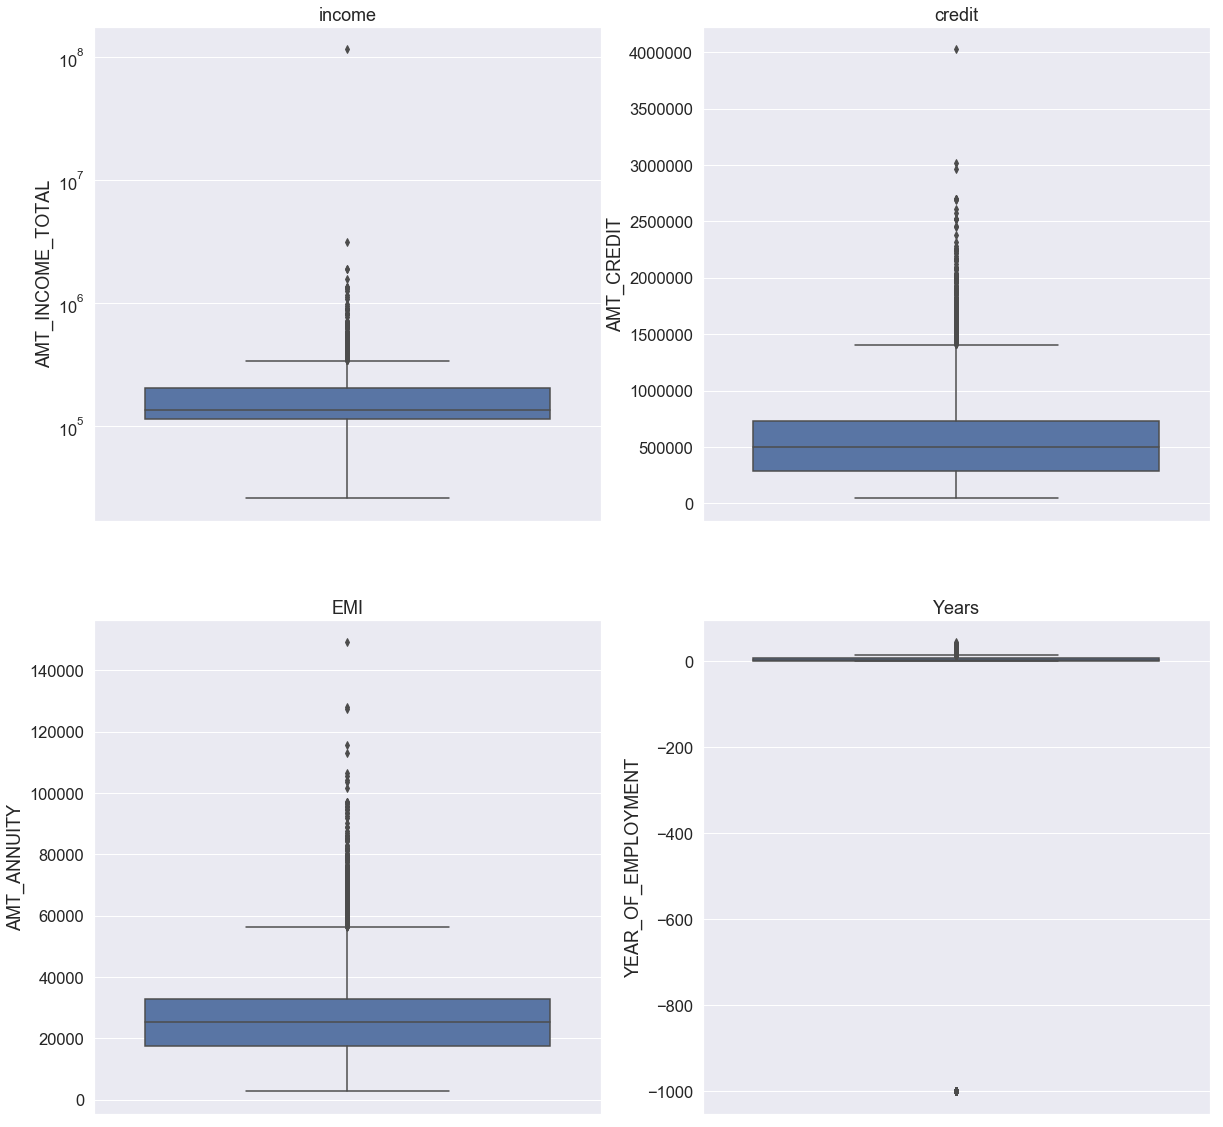

In [27]:
#4 numerical columns having outliers

plt.figure(1, figsize=(20, 20))

sns.set(font_scale=1.5)

# Below box plots help us to clearly identify the outliers in Income, Credit, Years of employment and no. of EMIs.

# subplot 1:
plt.subplot(2, 2, 1)
sns.boxplot(y='AMT_INCOME_TOTAL', data=final_target1)
plt.title("income")
plt.yscale('log')
# We can clearly identify that the range of the Income is between 10 to power 5 and 10 to power 6. The 25,50,75 and 100 percentiles
# are within the range of 10 to power 5 and 10 to power 6. And rest are the outliers.

# subplot 2:
plt.subplot(2, 2, 2)
sns.boxplot(y='AMT_CREDIT', data=final_target1)
plt.title("credit")

#Similarly, we can see that the 25,50,75 and 100 percentile range for Credit is between is 100000 to 1500000 and rest of the
#values are outliers

# subplot 3:
plt.subplot(2, 2, 3)
sns.boxplot(y='AMT_ANNUITY', data=final_target1)
plt.title("EMI")
# The annuity amounts are in a similar fashion distributed between 1000 to 58000.

# subplot 4:
plt.subplot(2, 2, 4)
sns.boxplot(y='YEAR_OF_EMPLOYMENT', data=final_target1)
plt.title("Years")

#Years of employment has a very unique outlier value which goes beyond -1000 years. It is a clear indicator outlier data which
# could be a result of human error while entering the data or default random value.

In [28]:
#data imbalance : 

imbalance_defaulter=round((len(final_target1.index)/len(final_target0.index))*100, 1)
imbalance_defaulter

8.8

####  Hence the Data Imbalance ratio here is 91.2 : 8.8

### Univariate Analysis

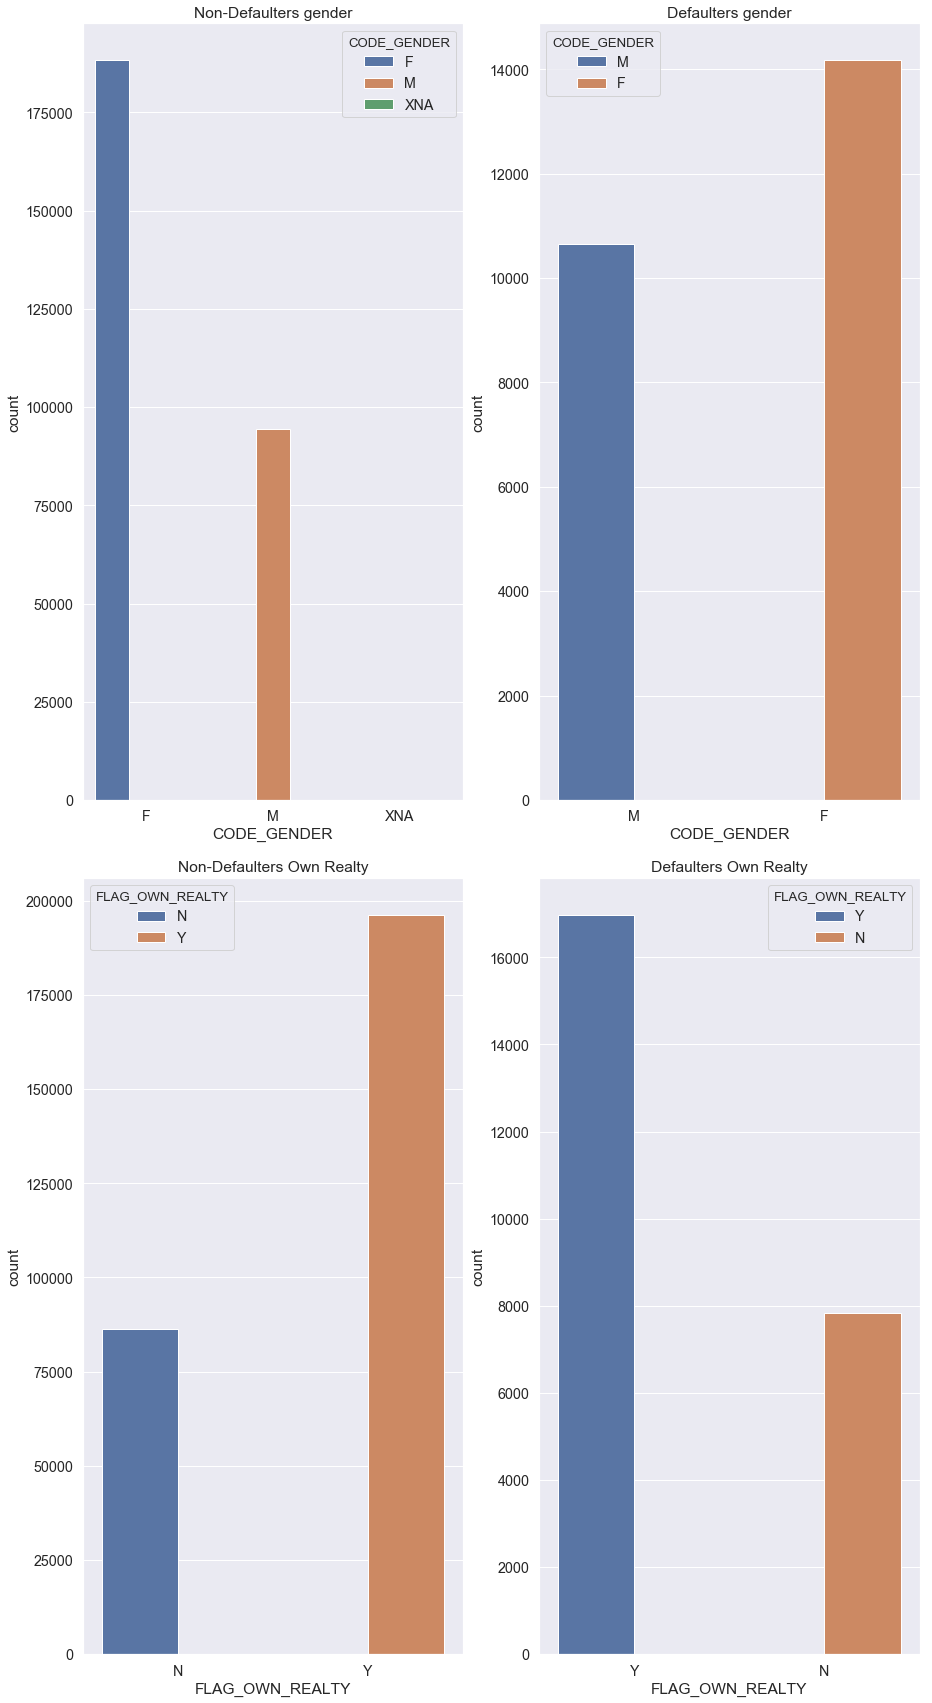

In [29]:
#Univariate categorical columns analysis

plt.figure(figsize=(15,30))
sns.set(font_scale=1.3)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.1)


plt.subplot(2, 2, 1)
plt.title('Non-Defaulters gender')
sns.countplot(x="CODE_GENDER", hue="CODE_GENDER",data=final_target0)

plt.subplot(2, 2, 2)
plt.title('Defaulters gender')
sns.countplot(x="CODE_GENDER",hue="CODE_GENDER", data=final_target1)
# Clearly, in the defaulters target group(on the right), the gender-female is the one which has the highest count 
# and this makes female gender a potential candidate who can default the repayment of loans.

plt.subplot(2, 2, 3)
plt.title('Non-Defaulters Own Realty')
sns.countplot(x="FLAG_OWN_REALTY",hue="FLAG_OWN_REALTY", data=final_target0)

plt.subplot(2, 2, 4)
plt.title('Defaulters Own Realty')
sns.countplot(x="FLAG_OWN_REALTY",hue="FLAG_OWN_REALTY", data=final_target1)
# Similarly, in the defaulters target group(on the right), the people owning a realty property are noticed to have the highest
# number and we can conclude that the people owning a realty can default payments, potentially because they have an added
#m responsibilty.


plt.show()

### Univartiate Segmented Analysis

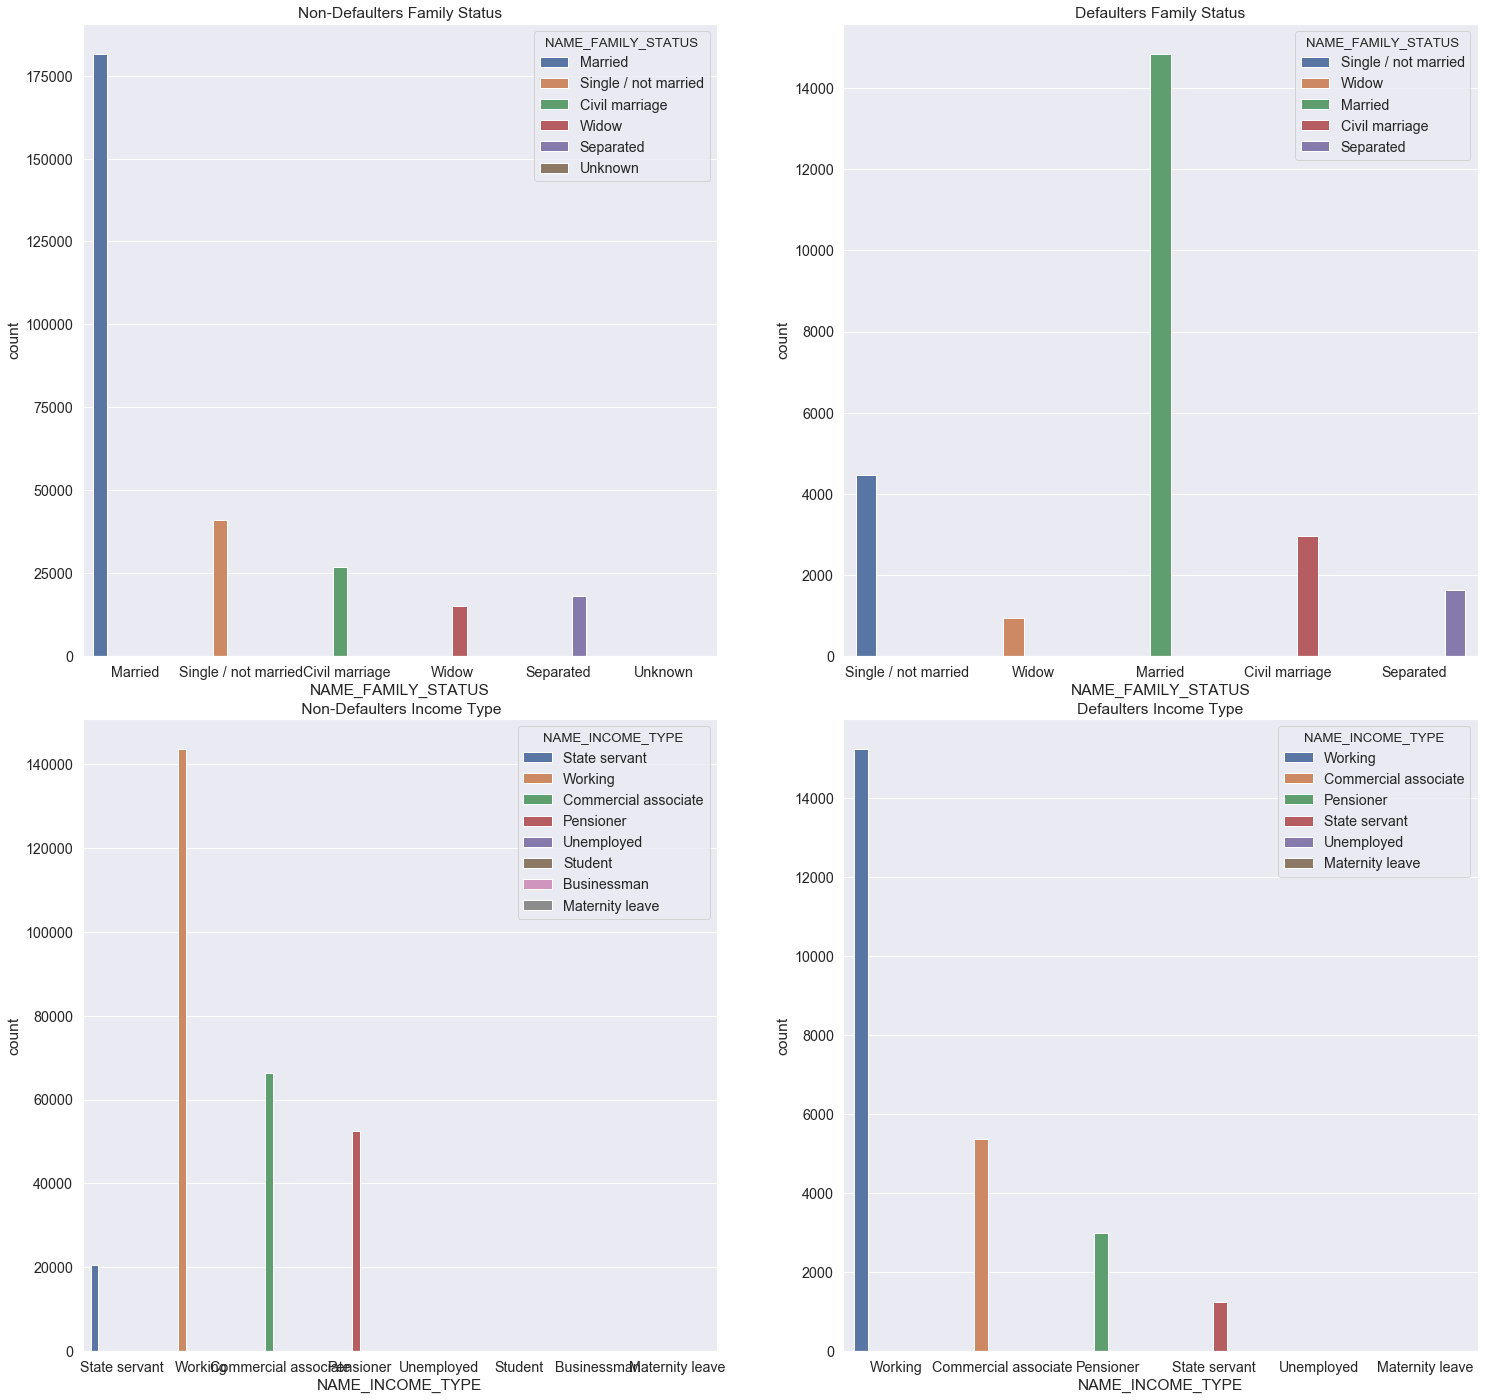

In [30]:
#Univariate categorical segment columns analysis
plt.figure(figsize=(25,50))
sns.set(font_scale=1.3)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.1)

plt.subplot(4, 2, 5)
plt.title('Non-Defaulters Family Status')
sns.countplot(x="NAME_FAMILY_STATUS",hue="NAME_FAMILY_STATUS",  data=final_target0)
plt.subplot(4, 2, 6)
plt.title('Defaulters Family Status')
sns.countplot(x="NAME_FAMILY_STATUS",hue="NAME_FAMILY_STATUS", data=final_target1)
# For Univariate segmented analysis, we have segmented the target=1 group on the basis of their Family status and it is 
# noticed that the people who have married or single status are the ones highest in the defaulting the loans. Family status,
# thus becomes an important aspect of analysis to identify the defaulters.

plt.subplot(4, 2, 7)
plt.title(' Non-Defaulters Income Type')
sns.countplot(x="NAME_INCOME_TYPE",hue="NAME_INCOME_TYPE",  data=final_target0)
plt.subplot(4, 2, 8)
plt.title('Defaulters Income Type')
sns.countplot(x="NAME_INCOME_TYPE",hue="NAME_INCOME_TYPE", data=final_target1)
# For Univariate segmented analysis, we have segmented the target=1 group on the basis of their Income type and it is 
# noticed that the people who are working have the highest number in the defaulting the loans. Also, if we closely analyse,
# then the people in category of business and students have never defaulted the loans(non defaulters group, on the left).
# Thus, we can conclude, that while giving credits we have to be mindful of the people or are not business people or students.

plt.show()

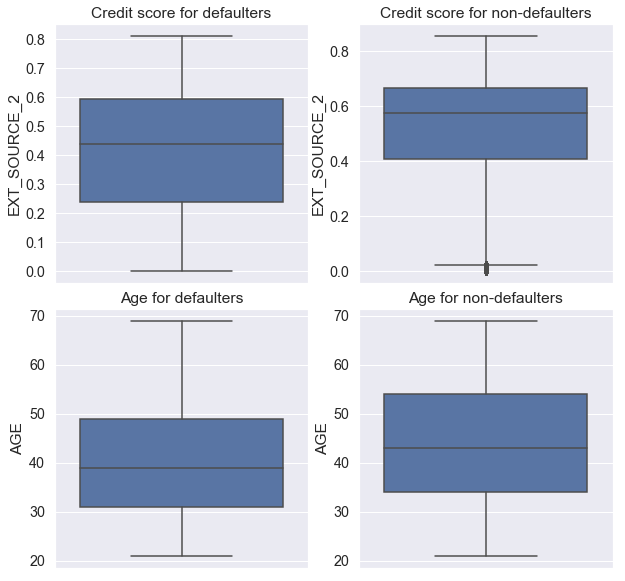

In [31]:
#Univariate Quantitative columns analysis


plt.figure(figsize=(10,10))
sns.set(font_scale=1.3)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.1)

# subplot 1:
plt.subplot(2, 2, 1)
sns.boxplot(y='EXT_SOURCE_2', data=final_target1)
plt.title("Credit score for defaulters")

# subplot 2:
plt.subplot(2, 2, 2)
sns.boxplot(y='EXT_SOURCE_2', data=final_target0)
plt.title("Credit score for non-defaulters")
# For univariate analysis of quantitative variables, the credit score or ext_source_2 is a crucial variable.
# It is evident from the plot that the defaulters have much lesser credit rating as compared to the non-defaulters group.
# The range from 25th to 75th percentile of defaulters lie in 0.25 to 0.6, while it is as much higher as 0.4 to 0.65 for
# non defaulters.
# Hence, while sending out loans, it is imperative to look for clients with higher credit rating.


# subplot 3:
plt.subplot(2, 2, 3)
sns.boxplot(y='AGE', data=final_target1)
plt.title("Age for defaulters")

# subplot 4:
plt.subplot(2, 2, 4)
sns.boxplot(y='AGE', data=final_target0)
plt.title("Age for non-defaulters")
# 2nd quantitative variable we have use for univariate non-categorical anayalysis is Age of the customer. It is seen as a trend
# that the age of the defaulter group is reltively lesser than the that of non-defaulter group.
# The median of the age of non-defaulters is above 40 and median of age of defaulters is below 40; also the 75th percentile of
# non defaulters is much higher than that of defaulters, which clearly indicates that the defaulters are of much younger age
# and financial liberty to repay loans at a younger age would be less as compared to the senior age group.

plt.show()


### Bivariate Analysis


Below is the bivariate analysis for two variables - credit score on the basis of gender for the defaulters group. 

As, we have analysed these two variables separately in univariate analysis and concluded that these two are potential
candidates to be mindful of while distirbuting the loans, the below chart helps us to drill down further to see, that the 
credit score of the females is higher than that of males. This means that, in the group of defaulters, because the rating of
males is low, we shall make the male gender as flag with this credit rating.

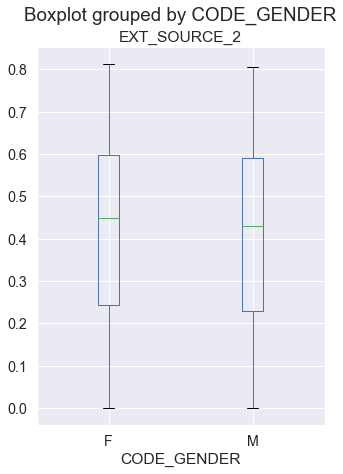

In [32]:
# Bivariate Analysis

final_target1.boxplot(column=['EXT_SOURCE_2'], by='CODE_GENDER', figsize= (5,7))


#### example-2

Below chart finds out the difference between the annuity paid by the customer group by gender in target=1 group.
And it turns out that the male population has a higher annuity to be paid as compared to the female population.

In the above, graph we saw that males have a lesser credit rating. It is a possibility, that because of higher
annuity amount, their credit rating is low as repayments could be a problem.

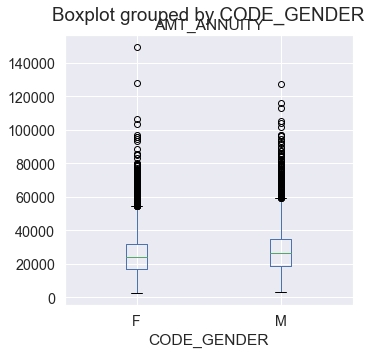

In [33]:
#Bivariate Analysis 2 example
final_target1.boxplot(column=['AMT_ANNUITY'], by='CODE_GENDER', figsize= (5,5))

In [34]:
# Bivariate analysis with corelation
x=final_target1[['AMT_ANNUITY','AMT_CREDIT','AMT_INCOME_TOTAL']]
x.corr()

# the below result gives a clear picture of how annuty, credit and income are positively corelated to each other.
# This means that, as the income goes up, the credit and annuity go up with it. This means, that the person, with a higher
# income can gets a higher credit with higher annuity. This is for target=1, which means that the higher income attracts
# higher credit and annuity and can be a reason for default payments.

,AMT_ANNUITY,AMT_CREDIT,AMT_INCOME_TOTAL
AMT_ANNUITY,1.000000,0.752195,0.046421
AMT_CREDIT,0.752195,1.000000,0.038131
AMT_INCOME_TOTAL,0.046421,0.038131,1.000000


In [35]:
#taking only Numerical columns for finding Correlation:

target0_num_col =final_target0.select_dtypes(include=['float64', 'int64'])
target1_num_col =final_target1.select_dtypes(include=['float64', 'int64'])

In [36]:
#Drop TARGET as not to be included in Correlation

target0_num_col.drop('TARGET',axis=1,inplace=True)
target1_num_col.drop('TARGET',axis=1,inplace=True)

C:\Users\aagarwal\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [39]:
target0_corr= target0_num_col.corr()
#target0_corr

In [38]:
target1_corr= target1_num_col.corr()
#target1_corr

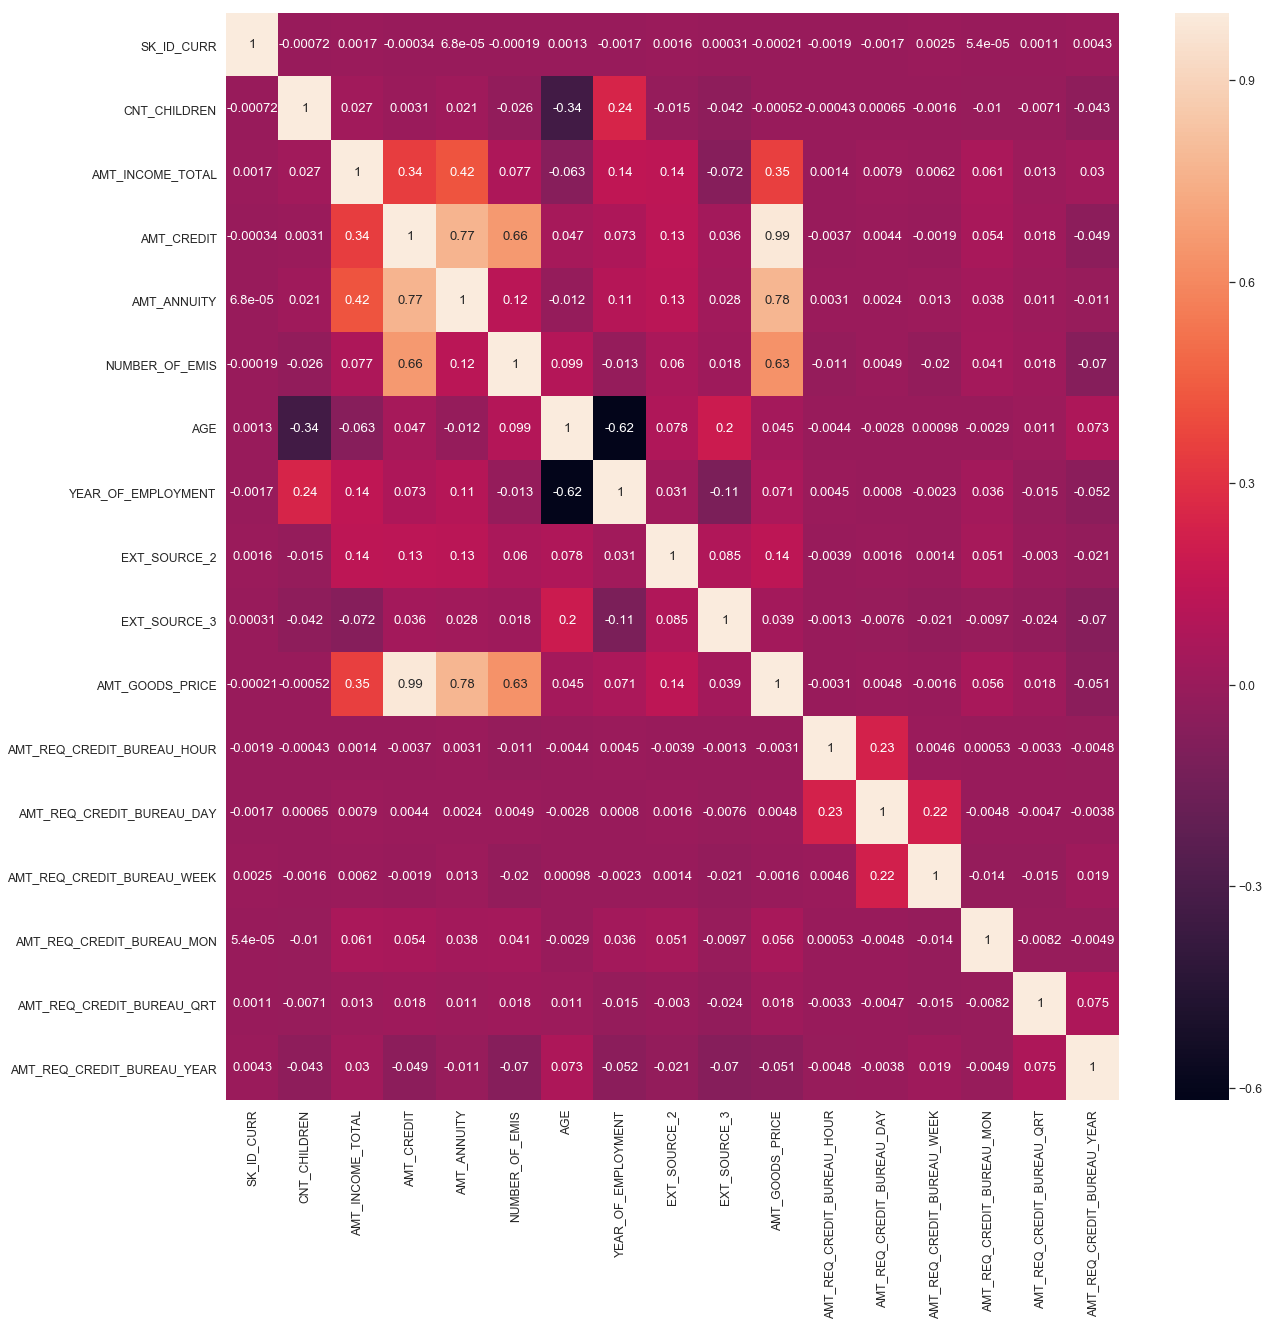

In [114]:
#Heat map Presentation for Non-Defaulters.
plt.figure(num=None,figsize=(20,20))
sns.set(font_scale=1.1)
sns.heatmap(target0_corr, annot=True)

### Top 10 correlation for the Client with NO payment difficulties and all other case:

In [41]:
top_10_non_defaulters= (target0_corr.where(np.triu(np.ones(target0_corr.shape),k=1).astype(np.bool)).stack())
top_10_non_defaulters.sort_values(ascending=False, inplace=True)

top_10_non_defaulters.head(10)


AMT_CREDIT                  AMT_GOODS_PRICE              0.987250
AMT_ANNUITY                 AMT_GOODS_PRICE              0.776686
AMT_CREDIT                  AMT_ANNUITY                  0.771309
                            NUMBER_OF_EMIS               0.660515
NUMBER_OF_EMIS              AMT_GOODS_PRICE              0.633592
AMT_INCOME_TOTAL            AMT_ANNUITY                  0.418953
                            AMT_GOODS_PRICE              0.349462
                            AMT_CREDIT                   0.342799
CNT_CHILDREN                YEAR_OF_EMPLOYMENT           0.243356
AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY    0.229065
dtype: float64

##### as show in the above cell, the top 10 NON DEFAULTERS having no Payment difficulties are :

- AMT_CREDIT and AMT_GOODS_PRICE having correlation of 0.987250
- AMT_ANNUITY and AMT_GOODS_PRICE having correlation of 0.776686
- AMT_CREDIT and AMT_ANNUITY having correlation of 0.771309
- AMT_CREDIT and NUMBER_OF_EMIS having correlation of 0.660515
- NUMBER_OF_EMIS and AMT_GOODS_PRICE having correlation of 0.633592
- AMT_INCOME_TOTAL and AMT_ANNUITY having correlation of 0.418953
- AMT_INCOME_TOTAL and AMT_GOODS_PRICE having correlation of 0.349462
- AMT_INCOME_TOTAL and AMT_CREDIT having correlation of 0.342799
- CNT_CHILDREN and YEAR_OF_EMPLOYMENT having correlation of 0.243356
- AMT_REQ_CREDIT_BUREAU_HOUR and AMT_REQ_CREDIT_BUREAU_DAY having correlation of 0.229065


Insight
The very obvious inference is that goods price and credit amount are very strongly corelated. This means that the as the price
of the goods go up, the credit given goes up to. And this would be because the application of the loan would be of higher 
amount. Similary, because the annuity amount and the credit are positively corelated too, as the credit amount goes up,
the annuity amount does. 


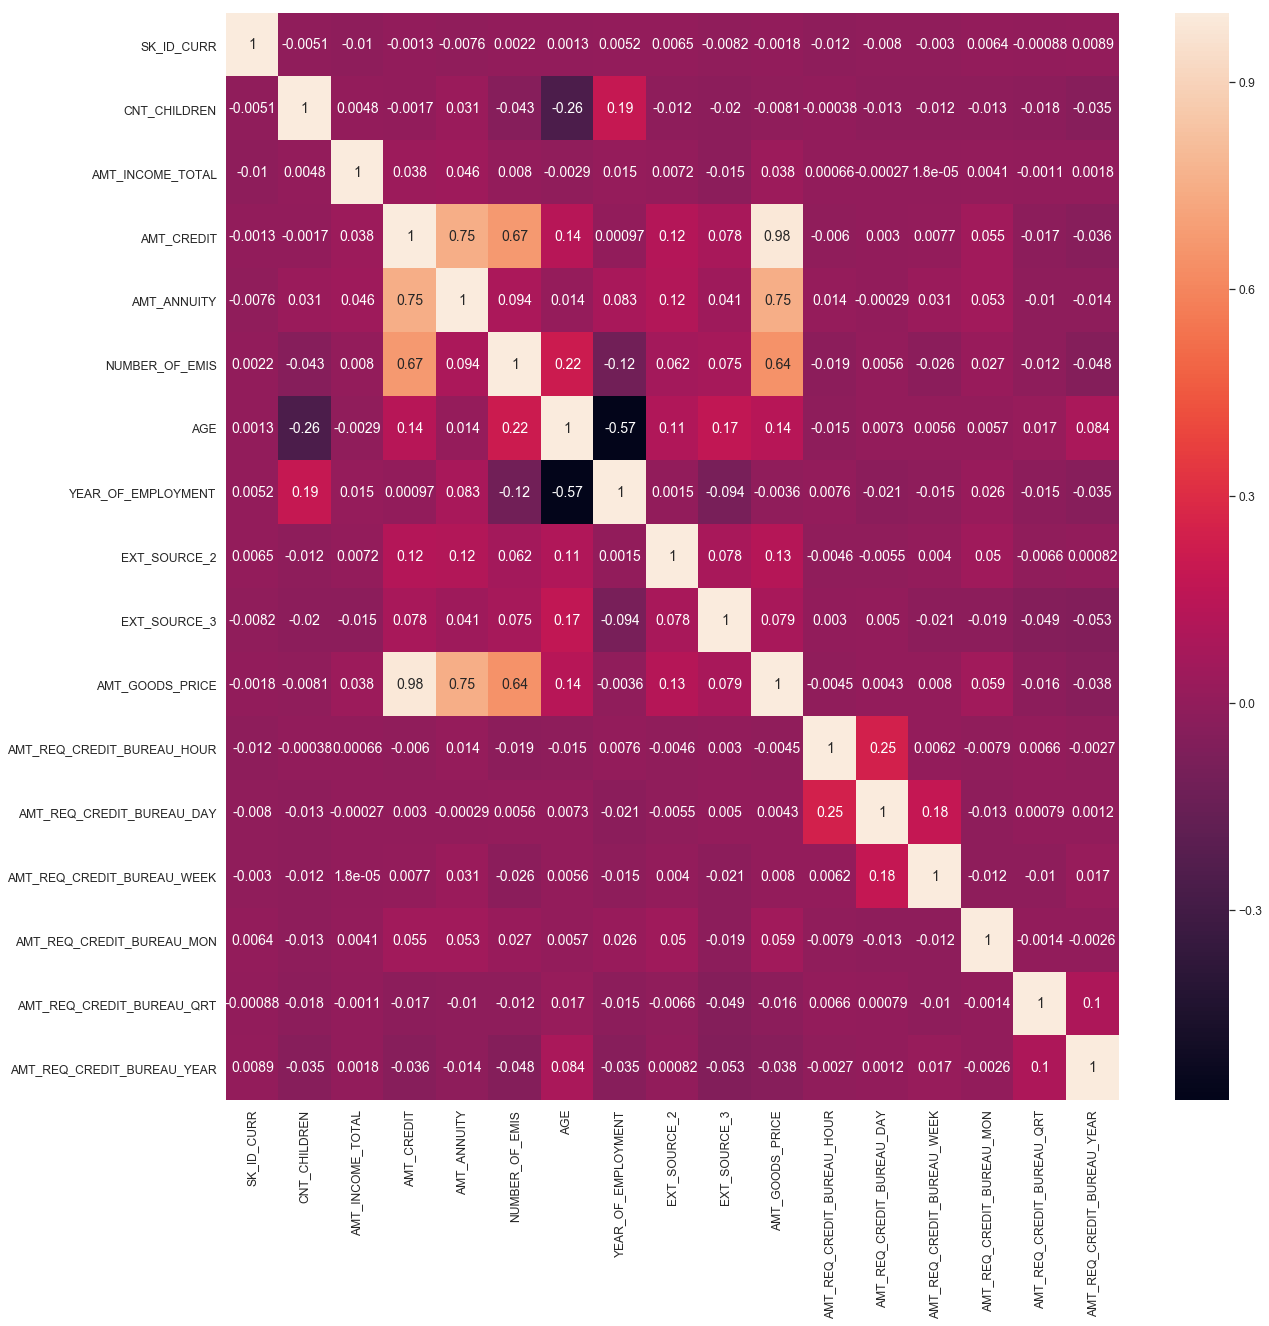

In [42]:
#Heat map Presentation for Defaulters i.e Client with Payment Difficulties.
plt.figure(num=None,figsize=(20,20))
sns.set(font_scale=1.1)
sns.heatmap(target1_corr, annot=True, annot_kws={"size": 14})

### top 10 correlation for the Client with payment difficulties and all other cases



In [43]:
top_10_defaulters= (target1_corr.where(np.triu(np.ones(target1_corr.shape),k=1).astype(np.bool)).stack())
top_10_defaulters.sort_values(ascending=False, inplace=True)

In [44]:
top_10_defaulters.head(10)


AMT_CREDIT                  AMT_GOODS_PRICE               0.983103
AMT_ANNUITY                 AMT_GOODS_PRICE               0.752699
AMT_CREDIT                  AMT_ANNUITY                   0.752195
                            NUMBER_OF_EMIS                0.672320
NUMBER_OF_EMIS              AMT_GOODS_PRICE               0.644761
AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY     0.246741
NUMBER_OF_EMIS              AGE                           0.216718
CNT_CHILDREN                YEAR_OF_EMPLOYMENT            0.191942
AMT_REQ_CREDIT_BUREAU_DAY   AMT_REQ_CREDIT_BUREAU_WEEK    0.184098
AGE                         EXT_SOURCE_3                  0.171801
dtype: float64

##### as show in the above cell, the top 10 DEFAULTERS having Payment difficulties are :

- AMT_CREDIT and AMT_GOODS_PRICE having correlation of 0.983103
- AMT_ANNUITY and AMT_GOODS_PRICE having correlation of 0.752699
- AMT_CREDIT and AMT_ANNUITY having correlation of 0.752195
- AMT_CREDIT and NUMBER_OF_EMIS having correlation of 0.672320
- NUMBER_OF_EMIS and AMT_GOODS_PRICE having correlation of 0.644761
- AMT_REQ_CREDIT_BUREAU_HOUR and AMT_REQ_CREDIT_BUREAU_DAY having correlation of 0.246741
- NUMBER_OF_EMIS and AGE having correlation of 0.216718
- CNT_CHILDREN and YEAR_OF_EMPLOYMENT having correlation of 0.191942
- AMT_REQ_CREDIT_BUREAU_DAY and AMT_REQ_CREDIT_BUREAU_WEEK having correlation of 0.184098
- AGE and EXT_SOURCE_3 having correlation of 0.171801

Insight
The very obvious inference is that goods price and credit amount are very strongly corelated. This means that the as the price
of the goods go up, the credit given goes up to. And this would be because the application of the loan would be of higher 
amount. Similary, because the annuity amount and the credit are positively corelated too, as the credit amount goes up,
the annuity amount does. 


#### Here we finish with the Analysis to be done on Application Dataframe.

## Data Cleaning on Previous Application Dataframe

In [45]:
#checking number of missing values in each column in Previous Application dataframe
#prev_app_df.isnull().sum()

In [46]:
#percentage of missing values in each column in Previous Application dataframe.
#round(100*(prev_app_df.isnull().sum()/len(prev_app_df.index)), 2)

In [47]:
prev_drop_columns=prev_app_df.columns[round(100*(prev_app_df.isnull().sum()/len(prev_app_df.index)), 2)>=50.00]
prev_drop_columns

Index(['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED'],
      dtype='object')

In [48]:
#removing columns having 50% or more NULL values in Previous Application Dataframe.
prev_app_df = prev_app_df.drop(prev_drop_columns, axis=1)

In [49]:
#old columns in Application data : (1670214, 37)
#printing current rows and columns after deletion
prev_app_df.shape

(1670214, 33)

In [50]:
#percent of NULL VALUES in the Columns after removing >50% NULL
#round(100*(prev_app_df.isnull().sum()/len(prev_app_df.index)), 2)

In [51]:
#missing values in rows
#prev_app_df.isnull().sum(axis = 1)

In [52]:
#prev_app_df.info()

In [53]:
#Below the calculation of the number of emis a client has to pay for the amount of the credit taken.
prev_app_df['NUMBER_OF_EMIS']=(round(prev_app_df['AMT_CREDIT']/prev_app_df['AMT_ANNUITY']))

In [54]:
#prev_app_df.describe()

### Performing analysis on Application Dataframe:

#### Identifying Outliers:



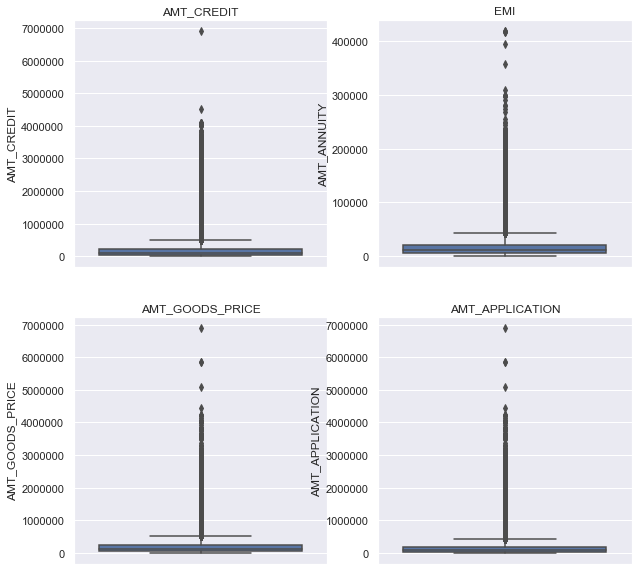

In [95]:
#4 numerical columns having outliers

plt.figure(1, figsize=(10,10))
sns.set(font_scale=1.0)


# subplot 1:
plt.subplot(2, 2, 1)
sns.boxplot(y='AMT_CREDIT', data=prev_app_df)
plt.title("AMT_CREDIT")

# subplot 2:
plt.subplot(2, 2, 2)
sns.boxplot(y='AMT_ANNUITY', data=prev_app_df)
plt.title("EMI")


# subplot 3:
plt.subplot(2, 2, 3)
sns.boxplot(y='AMT_GOODS_PRICE', data=prev_app_df)
plt.title("AMT_GOODS_PRICE")


# subplot 4:
plt.subplot(2, 2, 4)
sns.boxplot(y='AMT_APPLICATION', data=prev_app_df)
plt.title("AMT_APPLICATION")

plt.show()


#### Univariate Analysis

Text(0.5, 1.0, 'AMT_CREDIT Current Application')

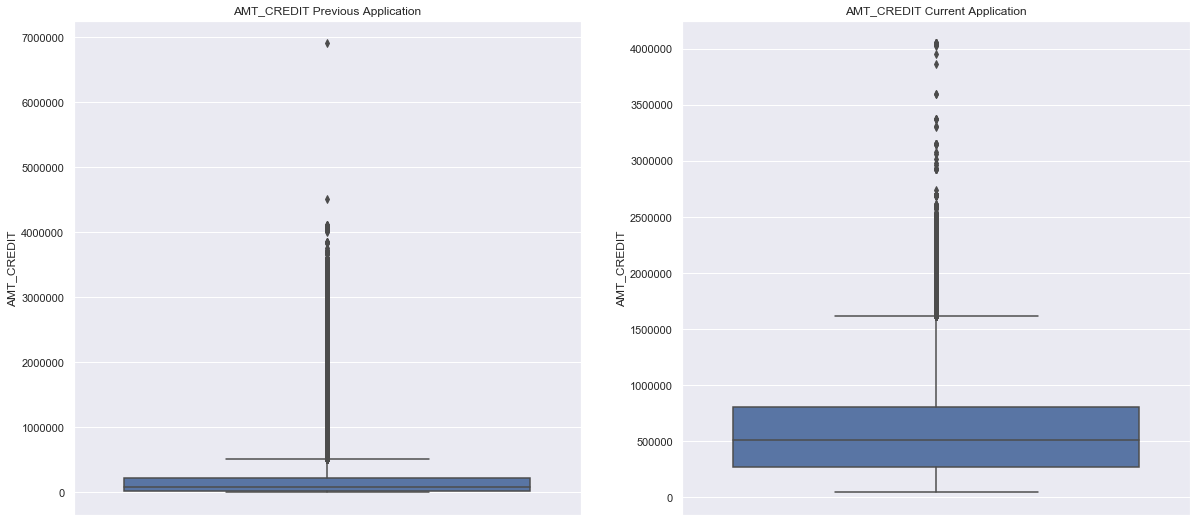

In [102]:
plt.figure(1, figsize=(20,20))
sns.set(font_scale=1.0)

# subplot 1:
plt.subplot(2, 2, 1)
sns.boxplot(y='AMT_CREDIT', data=prev_app_df)
plt.title("AMT_CREDIT Previous Application")

plt.subplot(2, 2, 2)
sns.boxplot(y='AMT_CREDIT', data=application_df)
plt.title("AMT_CREDIT Current Application")

# The below plot on the left gives the distribution of the Credit given out in the previous application data set. It is good
# notice that the full range of the of credit amount is distributed between 0 to 50000, while if we see on the right, which is
# the plot of credit amount of the current application data set, the median/50th percentile is at 50k. 
# this means that the credit amount being sent out is much higher in the current application as compared to the previous app.

#### Segmented Univariate Analysis

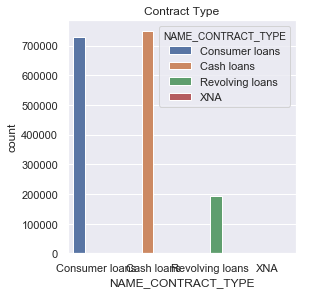

In [109]:
#segmented Univariate

plt.figure(figsize=(9,9))
sns.set(font_scale=1.0)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.1)

plt.subplot(2, 2, 1)
plt.title("Contract Type")
sns.countplot(x="NAME_CONTRACT_TYPE", hue="NAME_CONTRACT_TYPE",data=prev_app_df)

#From the below plot it is evident that the no. of cash loans sent out in the previous application is the highest. 
#It would be interesting to find out whether the amount of the loan applied is also highest for cash loans or not. We will
#check this in the next segment of Bivariate analysis.

plt.show()

#### Bivariate Analysis

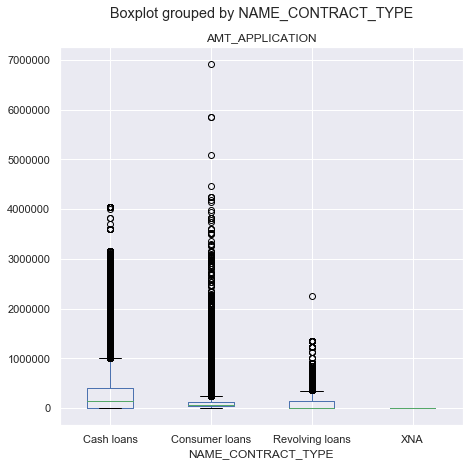

In [107]:
#Bivariate non-Categorical 
prev_app_df.boxplot(column=['AMT_APPLICATION'], by='NAME_CONTRACT_TYPE', figsize= (7,7))

#In the previous plot, we saw that the no. of cash loans was the highes in the previous app data. The below plot, drills down
#further to give us the insight that the application amount of cash loans sent were more than that of any other contract type.
#Furthermore, it would be interesting to know that the credits given lie in the same range as of applied amount or not.

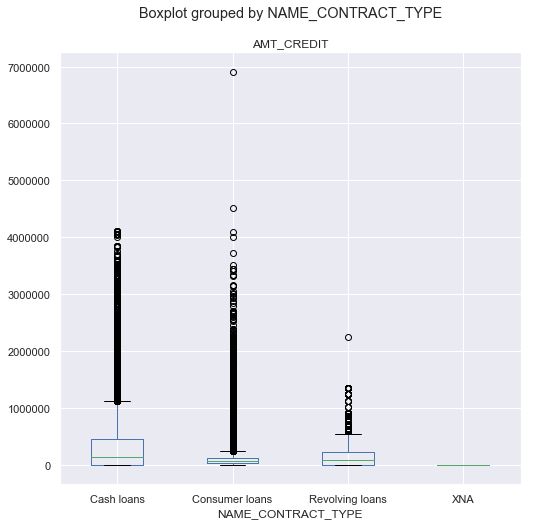

In [110]:
#example 2

prev_app_df.boxplot(column=['AMT_CREDIT'], by='NAME_CONTRACT_TYPE', figsize= (8,8))

#In the previous plot we saw the distribution of the applied amount wrt to the contract type and it cash loans had the highest
#amount. Now, we are going to see the distribution of the credit amount wrt to the contract type. And we can observe that
#the amount of credit given is highest for cash loans only. But if we observe keenly, we can see that the distirbution of applied
#and credit amounts are different for cash loans. Amount given as credit is more than amount applied. The 25th and 50th percentile
#seems similar, but definitely the 75th and 100th percentile of the credit amount is more than that of applied amount.

In [111]:
# Bivariate analysis with corelation

y=prev_app_df[['AMT_APPLICATION','AMT_GOODS_PRICE','AMT_CREDIT']]
y.corr()

#The below corelation matrix, helps us to understand that the three amount variables move positively in the previous application.

#most strongly corelated are the credit amount and the goods price, at .99. this means that the credit given is near 
#about the price of the good for which the loan is seeked. Similarly, the amount of good's price and amount of loan applied are
#strongly corelated too. And then the Credit amount and appplied amount, which are strongly corelated at 0.97.
#The inference we can draw is that- as the price of the good goes up, the person seeking the loan, applies for a greater amount.
#And hence, when the applied amount goes up, the credit amount is given goes up too.

,AMT_APPLICATION,AMT_GOODS_PRICE,AMT_CREDIT
AMT_APPLICATION,1.000000,0.999884,0.975824
AMT_GOODS_PRICE,0.999884,1.000000,0.993087
AMT_CREDIT,0.975824,0.993087,1.000000


### Conclusion

Gender- It is a critical variable to consider while sending out the loans; though the no. of defaulters are females is higher than that of males but 
the data showed us that the credit rating of male defaulters is low. Furthermore the annuity of males is higher which may tend to make them default the loans.
Hence Gender is an important aspect while finding defaulters.

Income Status- It was clearly observed in the analysis that the Business and Student group of people were never in the defaulters group, but rest others were in the 
defaulter group. Hence we should be mindful of the income type.

Goods Price- In both the data sets we have seen that the goods price is positively correlated to the credit and annuity, which means when the loan is applied for an 
expensive good, the credit and annuity go up and hence the risk of defaulting the loan.

Age- It was closely observed that the people of higher age group were able to repay loans better as compared to the people of younger age. Hence, Age becomes
an important factor to consider.

Type of Contract- It has been observed in both the data sets, that the max. applications came for cash loans and the amount given as credit was highest for cash loans.
Hence, cash loans become more prone to get defaulted and thus we shall check the type of loan to find the defaulters.
!


###                    --------------------------THANK YOU----------------------------------